## This notebook examines reddit comments on the science subreddit, examining previously removed comments. Attempting to train various machine learning models here to learn which comments should be removed. First, import the data.

In [136]:
import nltk
#nltk.download('wordnet')
import pandas as pd
import numpy as np
import re

df = pd.read_csv('reddit_200k_train.csv', encoding = 'latin_1')
df2 = pd.read_csv('reddit_200k_test.csv', encoding = 'latin_1')

In [137]:
df.head(10)

,Unnamed: 0,body,score.x,parent_id.x,id,created_utc.x,retrieved_on,REMOVED
0,1,I've always been taught it emerged from the ea...,2,t3_81u15i,dv551g6,1520121101,1524782256,False
1,2,"As an ECE, my first feeling as ""HEY THAT'S NOT...",2,t3_72sk35,dnl66g6,1506533157,1507150439,True
2,3,Monday: Drug companies stock dives on good new...,5,t3_8o88yr,e02sjhz,1528087570,1532170350,True
3,4,i learned that all hybrids are unfertile i won...,0,t3_6xg9t8,dmfojjp,1504290041,1506407514,False
4,5,Well i was wanting to get wasted tonight. Not...,3,t3_99wi9m,e4rtew8,1535140675,1537893540,False
5,6,So when we can remember a history where he sha...,4,t3_69fya9,dh6bkbf,1494006743,1496285592,False
6,7,Keep going! So close to a 100% run.,110,t3_926dfb,e33l7ug,1532647663,1536705787,True
7,8,"Rains here just start, no buildup.. one or two...",2,t3_9dzqzm,e5lmvpe,1536388817,1538826252,True
8,9,"That explains it, Ima bad girl! Im the worst ...",5,t3_81yesj,dv63j9z,1520179348,1524803905,True
9,10,"Hi BocceBaller42, your post has been removed f...",2,t3_5r1nu1,dd3pv7z,1485793932,1486560607,False


## There are no descriptions for the first and second columns. For now, I will ignore them and keep the model as simple as possible.

In [138]:
X_train = df['body']
y_train = df['REMOVED']
X_test = df2['BODY']
y_test = df2['REMOVED']

KeyError: 'BODY'

## Use count vectorizer to create a bag of words model and list some of the features

In [139]:
#WNlemma = nltk.WordNetLemmatizer()
#test = [WNlemma.lemmatize(t) for t in df['BODY']]

In [140]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#vect = CountVectorizer().fit(df['BODY'])
vect = TfidfVectorizer().fit(df['body'])
vect.get_feature_names()[::2000]

['00',
 '11186158',
 '1827',
 '2659346',
 '40795_2017_170_moesm4_esm',
 '663',
 '8y8oux',
 'acom',
 'aluminimum',
 'archiving',
 'babysitter',
 'bilgin',
 'bray',
 'carbon_footprint',
 'chlorotetracycline',
 'compassing',
 'cowered',
 'ddparam',
 'dickgirls',
 'downplaying',
 'eggsâ',
 'escutcheon',
 'fastlocâ',
 'foresee',
 'gele',
 'greenaway',
 'heaven',
 'huddled',
 'inattention',
 'ionised',
 'kajillion',
 'laptop',
 'lonelyness',
 'martincorena',
 'microdot',
 'mosanto',
 'ncomms14465',
 'norther',
 'orders_of_magnitude_',
 'particlephysics',
 'phylogenetic',
 'postbio',
 'pspi0000103',
 'reading',
 'residents',
 'russkies',
 'sciencebritannica',
 'shoestring',
 'sol3',
 'stephenson',
 'surrogacy',
 'tethering',
 'towls',
 'ultradistal',
 'v541',
 'warned',
 'wounder']

## Let's look at the data set populations and some other stats

In [141]:
print('Percentage of positive samples: ', np.sum(y_train)/len(y_train),'\n')
print('Average length of non-removed comments:', np.mean([len(w) for w in X_train[y_train==0]]))
print('Average length of removed comments:', np.mean([len(w) for w in X_train[y_train==1]]),'\n')
print('Percent number of non-removed comments with references:', np.mean([len(w) for w in X_train[y_train==0].str.findall(r'[rR]eference|[rR]ef\b|\\[\d\\]')]))
print('Percent number of removed comments with references:', np.mean([len(w) for w in X_train[y_train==1].str.findall(r'[rR]eference|[rR]ef\b|\\[\d\\]')]))

Percentage of positive samples:  0.38642861832876696 

Average length of non-removed comments: 292.22409549474173
Average length of removed comments: 156.24256232815347 

Percent number of non-removed comments with references: 0.021422108939498596
Percent number of removed comments with references: 0.0021162223114708518


## Only 2.4% of comments have references so it may not be a useful feature to test for. However the data indicates that the length of the comment itself could be a useful feature. We'll test this hypotheses below. First, construct the document-word matrix.

In [142]:
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree

model = LogisticRegression().fit(X_train_vectorized,y_train)
model2 = svm.SVC(kernel = 'linear')
model2.fit(X_train_vectorized,y_train)
model3 = tree.DecisionTreeClassifier()
model3.fit(X_train_vectorized,y_train)

D:\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [143]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

probs = model.predict_proba(X_train_vectorized)
probs2 = model2.decision_function(X_train_vectorized)
probs3 = model3.predict_proba(X_train_vectorized)

pred = model.predict(X_train_vectorized)
pred2 = model2.predict(X_train_vectorized)
pred3 = model3.predict(X_train_vectorized)

print('Logistic Regression Accuracy on training set: %.3f' % accuracy_score(y_train,pred))
print('Logistic Regression Precision on training set: %.3f' % precision_score(y_train,pred))
print('Logistic Regression Recall on training set: %.3f' % recall_score(y_train,pred))
print('Logistic Regression AUC on training set: %.3f' % roc_auc_score(y_train,probs[:,1]),'\n')

print('Linear SVM Accuracy on training set: %.3f' % accuracy_score(y_train,pred2))
print('Linear SVM Precision on training set: %.3f' % precision_score(y_train,pred2))
print('Linear SVM Recall on training set: %.3f' % recall_score(y_train,pred2))
print('SVM AUC on training set: %.3f' % roc_auc_score(y_train,probs2),'\n')

print('DT Accuracy on training set: %.3f' % accuracy_score(y_train,pred3))
print('DT Precision on training set: %.3f' % precision_score(y_train,pred3))
print('DT Recall on training set: %.3f' % recall_score(y_train,pred3))
print('DT AUC on training set: %.3f' % roc_auc_score(y_train,probs3[:,1]),'\n')

probs = model.predict_proba(X_test_vectorized)
probs2 = model2.decision_function(X_test_vectorized)
probs3 = model3.predict_proba(X_test_vectorized)

pred = model.predict(X_test_vectorized)
pred2 = model2.predict(X_test_vectorized)
pred3 = model3.predict(X_test_vectorized)

print('Logistic Regression Accuracy: %.3f' % accuracy_score(y_test,pred))
print('Logistic Regression Precision: %.3f' % precision_score(y_test,pred))
print('Logistic Regression Recall: %.3f' % recall_score(y_test,pred))
print('Logistic Regression AUC: %.3f' % roc_auc_score(y_test,probs[:,1]),'\n')

print('Linear SVM Accuracy: %.3f' % accuracy_score(y_test,pred))
print('Linear SVM Precision: %.3f' % precision_score(y_test,pred2))
print('Linear SVM Recall: %.3f' % recall_score(y_test,pred2))
print('SVM AUC: %.3f' % roc_auc_score(y_test,probs2),'\n')

print('DT Accuracy: %.3f' % accuracy_score(y_test,pred3))
print('DT Precision: %.3f' % precision_score(y_test,pred3))
print('DT Recall: %.3f' % recall_score(y_test,pred3))
print('DT AUC on training set: %.3f' % roc_auc_score(y_test,probs3[:,1]),'\n')

Logistic Regression Accuracy on training set: 0.760
Logistic Regression Precision on training set: 0.718
Logistic Regression Recall on training set: 0.623
Logistic Regression AUC on training set: 0.835 

Linear SVM Accuracy on training set: 0.778
Linear SVM Precision on training set: 0.735
Linear SVM Recall on training set: 0.664
SVM AUC on training set: 0.851 

DT Accuracy on training set: 0.999
DT Precision on training set: 0.999
DT Recall on training set: 0.998
DT AUC on training set: 1.000 

Logistic Regression Accuracy: 0.788
Logistic Regression Precision: 0.738
Logistic Regression Recall: 0.533
Logistic Regression AUC: 0.851 

Linear SVM Accuracy: 0.788
Linear SVM Precision: 0.735
Linear SVM Recall: 0.575
SVM AUC: 0.853 

DT Accuracy: 0.906
DT Precision: 0.848
DT Recall: 0.866
DT AUC on training set: 0.898 



## Clearly the decision trees are overfitting, but even so, are performing much better on the test set compared to the other methods. Before we start trying to tune the models any further, let's try adding in the comment length as a feature.

In [144]:
from scipy.sparse import csr_matrix, hstack
comment_length_train = [len(w) for w in X_train]
comment_length_test = [len(w) for w in X_test]

#comment_length_train/np.max(comment_length_train) #Rescale feature
#comment_length_test/np.max(comment_length_test) #Rescale feature
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)
X_train_vectorized = hstack([X_train_vectorized, csr_matrix(comment_length_train).T],'csr')
X_test_vectorized = hstack([X_test_vectorized, csr_matrix(comment_length_test).T],'csr')

treeclf = tree.DecisionTreeClassifier()
model3_v2 = treeclf.fit(X_train_vectorized,y_train)
probs_v2 = model3_v2.predict_proba(X_test_vectorized)
pred_v2 = model3_v2.predict(X_test_vectorized)

print('DT Accuracy: %.3f' % accuracy_score(y_test,pred_v2))
print('DT Precision: %.3f' % precision_score(y_test,pred_v2))
print('DT Recall: %.3f' % recall_score(y_test,pred_v2))
print('DT AUC: %.3f' % roc_auc_score(y_test,probs_v2[:,1]))

DT Accuracy: 0.910
DT Precision: 0.857
DT Recall: 0.868
DT AUC: 0.900


## At this point I try to introduce the tiniest bit of regularization by setting the minimum number of samples for a split to 5. Interestingly, test set metrics go down!

In [168]:
#print(model3_v2.tree_.max_depth)
treeclf = tree.DecisionTreeClassifier(min_samples_split = 5)
model3_v3 = treeclf.fit(X_train_vectorized,y_train)
probs_v3 = model3_v3.predict_proba(X_test_vectorized)
pred_v3 = model3_v3.predict(X_test_vectorized)

print('DT Accuracy: %.3f' % accuracy_score(y_test,pred_v3))
print('DT Precision: %.3f' % precision_score(y_test,pred_v3))
print('DT Recall: %.3f' % recall_score(y_test,pred_v3))
print('DT AUC: %.3f' % roc_auc_score(y_test,probs_v3[:,1]))

DT Accuracy: 0.905
DT Precision: 0.844
DT Recall: 0.866
DT AUC: 0.905


## At this point I tried many cross validation methods with similar results (not shown here). It seemed like the heavily overfitted model always performed best. Maybe there was significant data leakage from training to test set?

In [169]:
X_test[X_test.duplicated()]

4663          Why are so many comments removed?
5258    Why are so many comments being removed?
6098     Why the fuck is every comment removed?
Name: BODY, dtype: object

In [170]:
##Make sure train and test don't have identical entries
print(np.shape(df))
print(np.shape(df2))
df2 = df2.rename(columns={'BODY':'body'})
test = pd.merge(df,df2,on=['body'],how='inner')
test

(167529, 8)
(55843, 8)


,Unnamed: 0_x,body,score.x_x,parent_id.x_x,id_x,created_utc.x_x,retrieved_on_x,REMOVED_x,Unnamed: 0_y,score.x_y,parent_id.x_y,id_y,created_utc.x_y,retrieved_on_y,REMOVED_y
0,320,Why are so many comments removed?,41,t3_98j5bn,e4h8oic,1534709034,1537715871,True,3844,2,t3_5uh20x,dduxjsh,1487330495,1488917160,True
1,320,Why are so many comments removed?,41,t3_98j5bn,e4h8oic,1534709034,1537715871,True,5140,7,t3_7tcpcn,dtcrllm,1517118806,1518354115,True
2,320,Why are so many comments removed?,41,t3_98j5bn,e4h8oic,1534709034,1537715871,True,23129,2,t3_7z4lr6,dulymk3,1519238646,1520089463,False
3,320,Why are so many comments removed?,41,t3_98j5bn,e4h8oic,1534709034,1537715871,True,29605,2,t3_6xexd1,dmfx90x,1504299861,1506411741,True
4,320,Why are so many comments removed?,41,t3_98j5bn,e4h8oic,1534709034,1537715871,True,41480,5,t3_81qpk9,dv52tzp,1520118420,1524781015,True
5,320,Why are so many comments removed?,41,t3_98j5bn,e4h8oic,1534709034,1537715871,True,46145,16,t3_5waao3,de95f36,1488151707,1489166983,True
6,320,Why are so many comments removed?,41,t3_98j5bn,e4h8oic,1534709034,1537715871,True,47546,2,t3_7w19qo,dtxi3qg,1518099333,1519047663,False
7,320,Why are so many comments removed?,41,t3_98j5bn,e4h8oic,1534709034,1537715871,True,53252,2,t3_880j3l,dwi5st8,1522367616,1525735883,False
8,320,Why are so many comments removed?,41,t3_98j5bn,e4h8oic,1534709034,1537715871,True,53346,3,t3_7a2pmo,dp6vvp9,1509547963,1512016478,True
9,320,Why are so many comments removed?,41,t3_98j5bn,e4h8oic,1534709034,1537715871,True,54760,17,t3_84nrs2,dvs5qdv,1521176101,1525221676,True


## It appears that many of the removed comments are comments that question comment removal! Also a significant portion of removed comments are memes, one-liners and anti-vax copy-pastes. It's starting to make sense why heavily overfitting (memorizing) the training set actually produces better results.

## I will make one last attempt with a random forest model, which should generalize a bit better than decision trees.

In [210]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
model4 = RFC.fit(X_train_vectorized,y_train)


probs4 = model4.predict_proba(X_train_vectorized)
pred4 = model4.predict(X_train_vectorized)

print('RF training Accuracy: %.3f' % accuracy_score(y_train,pred4))
print('RF training Precision: %.3f' % precision_score(y_train,pred4))
print('RF training Recall: %.3f' % recall_score(y_train,pred4))
print('RF training AUC: %.3f' % roc_auc_score(y_train,probs4[:,1]))


probs4 = model4.predict_proba(X_test_vectorized)
pred4 = model4.predict(X_test_vectorized)

print('RF Accuracy: %.3f' % accuracy_score(y_test,pred4))
print('RF Precision: %.3f' % precision_score(y_test,pred4))
print('RF Recall: %.3f' % recall_score(y_test,pred4))
print('RF AUC: %.3f' % roc_auc_score(y_test,probs4[:,1]))

D:\Miniconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF training Accuracy: 0.980
RF training Precision: 0.995
RF training Recall: 0.953
RF training AUC: 0.999
RF Accuracy: 0.912
RF Precision: 0.932
RF Recall: 0.784
RF AUC: 0.961


## Significant improvement in AUC but also a drop in recall. We can optimize the decision boundary to maximize accuracy and get a nicer balance between precision/recall.

DT Accuracy: 0.919
DT Precision: 0.884
DT Recall: 0.861


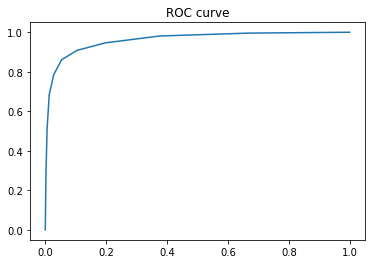

In [211]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test,probs4[:,1],drop_intermediate = False)
plt.title('ROC curve')
plt.plot(fpr,tpr)

opt_thresh = thresholds[np.argmin((1-tpr)**2 + fpr**2)] +0.06

print('DT Accuracy: %.3f' % accuracy_score(y_test,probs4[:,1]>opt_thresh))
print('DT Precision: %.3f' % precision_score(y_test,probs4[:,1]>opt_thresh))
print('DT Recall: %.3f' % recall_score(y_test,probs4[:,1]>opt_thresh))

## Conclusion: Decision trees seemed to perform the best compared to logistic regression and SVM models but were difficult to regularize and maintain good test metrics. Random forests were a good way to avoid overfitting while maintaining high accuracy (92%).

## Future work: Optimize random forest parameters, implement something like a profanity filter to further pre-process text, and try various neural network models